In [1]:
import vipy
import torch
import numpy as np
from keynet.system import PermutationKeynet
from keynet.mnist import LeNet_AvgPool

In [2]:
# Randomly initialize a lenet torch network 
net = LeNet_AvgPool()
inshape = (1,28,28)

In [3]:
# Create a (sensor, model) pair for a keyed sensor and keynet
(sensor, knet) = PermutationKeynet(inshape, net, do_output_encryption=False)

[keynet.layers.KeyNet]: Keying "conv1"
[keynet.layers.KeyNet]: Keying "relu1"
[keynet.layers.KeyNet]: Keying "pool1"
[keynet.layers.KeyNet]: Keying "conv2"
[keynet.layers.KeyNet]: Keying "relu2"
[keynet.layers.KeyNet]: Keying "pool2"
[keynet.layers.KeyNet]: Keying "fc1"
[keynet.layers.KeyNet]: Keying "relu3"
[keynet.layers.KeyNet]: Keying "fc2"
[keynet.layers.KeyNet]: Keying "relu4"
[keynet.layers.KeyNet]: Keying "fc3"


In [4]:
# Load an example image as a torch tensor and encode with the lenet
x_plain = sensor.load('owl.jpg').tensor()
y = net.forward(x_plain).detach().numpy().flatten()

# Load the same image as an encrypted torch tensor and encode with the keynet
x_cipher = sensor.load('owl.jpg').encrypt().tensor()
yh = knet.forward(x_cipher).detach().numpy().flatten()

# The output of the keynet is identical to the output of the source network
assert np.allclose(y, yh, atol=1E-5)

In [5]:
# Create another (sensor, model) pair
(another_sensor, another_keynet) = PermutationKeynet(inshape, net, do_output_encryption=False)

# The keyed image cannot be applied to any other keynet
yh_another = another_keynet.forward(x_cipher).detach().numpy().flatten()
assert not np.allclose(yh, yh_another, atol=1E-5)

[keynet.layers.KeyNet]: Keying "conv1"
[keynet.layers.KeyNet]: Keying "relu1"
[keynet.layers.KeyNet]: Keying "pool1"
[keynet.layers.KeyNet]: Keying "conv2"
[keynet.layers.KeyNet]: Keying "relu2"
[keynet.layers.KeyNet]: Keying "pool2"
[keynet.layers.KeyNet]: Keying "fc1"
[keynet.layers.KeyNet]: Keying "relu3"
[keynet.layers.KeyNet]: Keying "fc2"
[keynet.layers.KeyNet]: Keying "relu4"
[keynet.layers.KeyNet]: Keying "fc3"


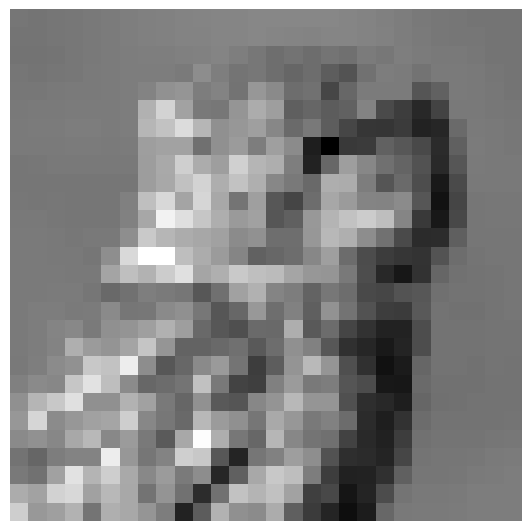

In [6]:
# This is the original image, resized to be (28x28), and input into the lenet network
im_plain = sensor.decrypt().image().resize(512, 512, interp='nearest').show()

torch.Size([1, 1, 28, 28])


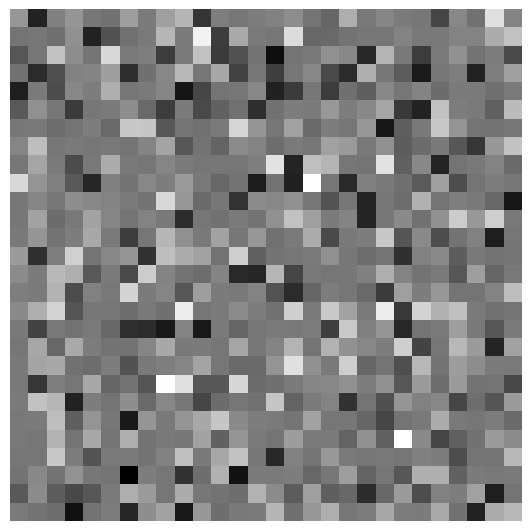

torch.Size([1, 1, 28, 28])


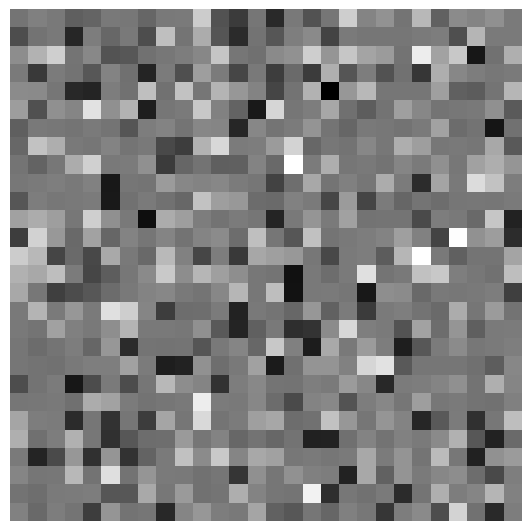

In [7]:
# These are the keyed images, input to the keynet, which is unrecognizable to a human
im_cipher = sensor.encrypt().image().resize(512, 512, interp='nearest').show()
im_cipher = another_sensor.load('owl.jpg').encrypt().image().resize(512, 512, interp='nearest').show()